1. Bibliothèques importées avec succès.

2. Données chargées. Taille du dataset : (150, 5)
   Classes : ['setosa' 'versicolor' 'virginica']

3. Introduction artificielle de valeurs manquantes (NaN)...
   Nombre total de valeurs manquantes générées : 32

4. Nettoyage des données...
   Imputation terminée (les NaN ont été remplacés par la moyenne).
   Valeurs manquantes restantes : 0

5. Analyse Exploratoire (EDA)...
   Statistiques descriptives (premières 5 colonnes) :
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.819014          3.050000           3.756338   
std             0.803677          0.429414           1.727024   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.200000   
75%             6.400000          3.300000           5.100000   
max    

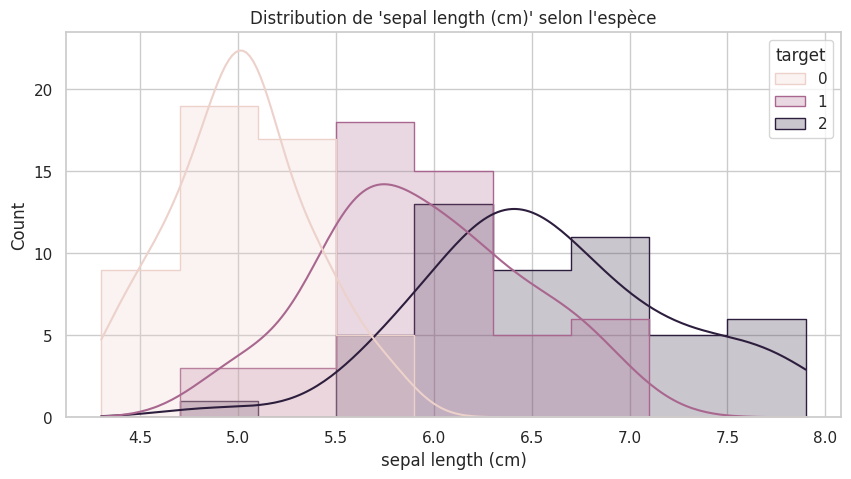

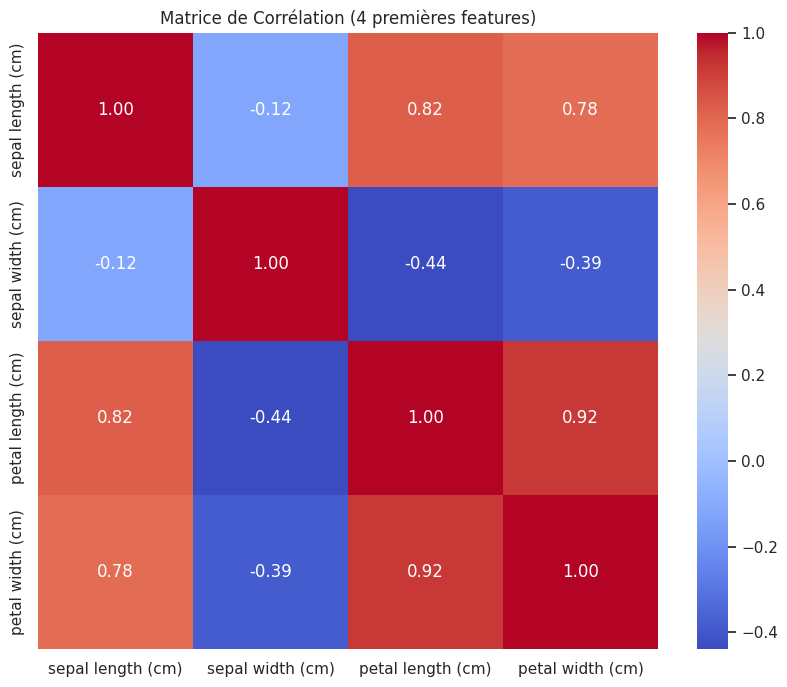


6. Séparation effectuée :
   Entraînement : 120 échantillons
   Test : 30 échantillons

7. Entraînement du modèle (Random Forest Classifier)...
   Modèle entraîné avec succès.

8. Évaluation des performances...
   >>> Accuracy Score : 100.00%

   >>> Rapport de Classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



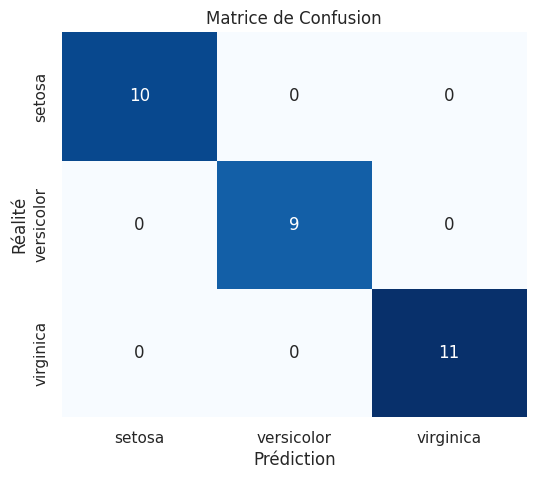


--- FIN DU SCRIPT ---


In [1]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE)
# Dataset : IRIS (classification de fleurs)
# ==============================================================================

# 1. IMPORTATION DES BIBLIOTHÈQUES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-Learn spécifiques
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées avec succès.\n")

# 2. CHARGEMENT DES DONNÉES
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

print(f"2. Données chargées. Taille du dataset : {df.shape}")
print(f"   Classes : {data.target_names}\n")

# 3. SIMULATION DE DONNÉES SALES
print("3. Introduction artificielle de valeurs manquantes (NaN)...")

np.random.seed(42)

df_dirty = df.copy()
feature_columns = df.columns[:-1]

for col in feature_columns:
    df_dirty.loc[df_dirty.sample(frac=0.05).index, col] = np.nan

print(f"   Nombre total de valeurs manquantes générées : {df_dirty.isnull().sum().sum()}\n")

# 4. NETTOYAGE / IMPUTATION
print("4. Nettoyage des données...")

X = df_dirty.drop("target", axis=1)
y = df_dirty["target"]

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X_clean = pd.DataFrame(X_imputed, columns=X.columns)

print("   Imputation terminée (les NaN ont été remplacés par la moyenne).")
print(f"   Valeurs manquantes restantes : {X_clean.isnull().sum().sum()}\n")

# 5. ANALYSE EXPLORATOIRE (EDA)
print("5. Analyse Exploratoire (EDA)...")
print("   Statistiques descriptives (premières 5 colonnes) :")
print(X_clean.iloc[:, :5].describe())

plt.figure(figsize=(10, 5))
feature_to_plot = "sepal length (cm)"
sns.histplot(data=df, x=feature_to_plot, hue="target", kde=True, element="step")
plt.title(f"Distribution de '{feature_to_plot}' selon l'espèce")
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = X_clean.iloc[:, :4].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation (4 premières features)")
plt.show()

# 6. SÉPARATION TRAIN / TEST
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

print("\n6. Séparation effectuée :")
print(f"   Entraînement : {X_train.shape[0]} échantillons")
print(f"   Test : {X_test.shape[0]} échantillons\n")

# 7. MODÉLISATION
print("7. Entraînement du modèle (Random Forest Classifier)...")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné avec succès.\n")

# 8. ÉVALUATION
print("8. Évaluation des performances...")

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"   >>> Accuracy Score : {acc*100:.2f}%")

print("\n   >>> Rapport de Classification :")
print(classification_report(y_test, y_pred, target_names=data.target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=data.target_names,
    yticklabels=data.target_names,
)
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de Confusion")
plt.show()

print("\n--- FIN DU SCRIPT ---")
